# Python for Data Analysis, pt. 2
## Data visualization

## Introducing `seaborn`

There are several popular and equally advantageous data visualization packages in Python.  `seaborn` is one of them: let's take a look!

### `seaborn` and `matplotlib`

`seaborn` is built on `matplotlib`, similarly to how `pandas` is built on top of `numpy`. 

This package will help us build beautiful, statistically-informed visualizations that are optimized to work with `pandas` DataFrames.

#### Loading `seaborn`

If `seaborn` is not installed on your computer, you can do so with the below command:

In [1]:
# Install seaborn
#!pip install seaborn

#### Aliasing `seaborn` 

If you remember one thing from this class, remember when and how to import modules! `sns` is a common alias for `seaborn`:

In [2]:
# Let's get started with seaborn!
import seaborn as sns

In C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\User\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


Great! Now that `seaborn` is ready to use, let's read in our data. We will be looking at vehicle mileage statistics. 

In [3]:
import pandas as pd
mpg = pd.read_csv('data/mpg.csv')
mpg.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  16.0          8         400.0         230    4278           9.5   
1  14.0          8         455.0         225    4425          10.0   
2  14.0          8         455.0         225    3086          10.0   
3  12.0          8         455.0         225    4951          11.0   
4  14.0          8         454.0         220    4354           9.0   

   model year  origin                  car name  
0          73       1        pontiac grand prix  
1          70       1          pontiac catalina  
2          70       1   buick estate wagon (sw)  
3          73       1  buick electra 225 custom  
4          70       1          chevrolet impala

### Let's get started!

Like with most topics in this class, we are just scratching the surface of what's possible with data visualization in Python. 

To learn more, check out the [`seaborn` documentation](https://seaborn.pydata.org) or the resources at the end of this course.

You may be familiar with the types of charts we'll build here. They are all common practices and familiar to build in Excel.

However, **we won't building graphs through a menu, but by coding it!** 

We'll get started plotting one variable, or *univariate* plotting, and then move to two, or *bivariate*. 

# Univariate plotting

- Histograms
- Count plots

### Histograms

A histogram displays how many observations are found within given intervals of a variable. 

We can use [`distplot()`](https://seaborn.pydata.org/generated/seaborn.distplot.html) to plot a histogram in `seaborn`.

Let's look at the distribution of the `mpg` variable. 

We will pass a `pandas` Series into `distplot()` using bracket `[]` notation:

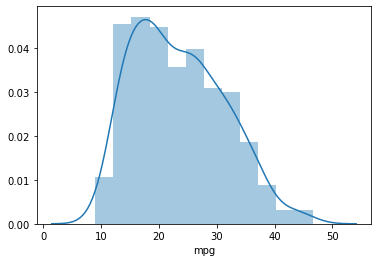

In [4]:
# Plot a histogram of mpg
sns.distplot(mpg['mpg'])

From this plot we can tell that cars range in mileage from about 10 to 45 mpg, with the most frequent mileages around 15-25 mpg.

#### Customizing a histogram

There are many options to [customize `displot()`](http://seaborn.pydata.org/generated/seaborn.distplot.html) -- let's customize the number of bins with the `bins` argument:

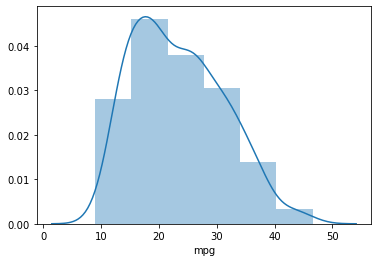

In [5]:
# We can set our own number of bins 
# with bin = n
sns.distplot(mpg['mpg'], bins=6)

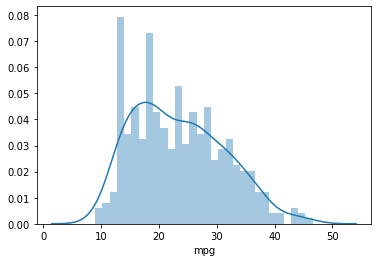

In [6]:
# What happens if we increase the 
# number of bins? 
sns.distplot(mpg['mpg'], bins=30)

### Count plots

A count plot displays the number of observations per unique value of a category. 

We will use [`countplot()`](https://seaborn.pydata.org/generated/seaborn.countplot.html) to do this.

For example, we can count the number of cars with 4 cylinders versus 6, etc. 

We'll again pass a Series into the `seaborn` method:

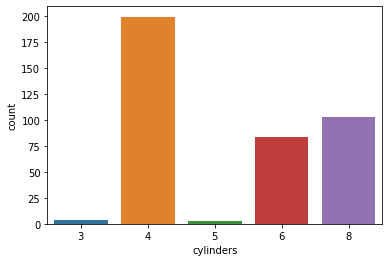

In [6]:
# Count the number of observations 
# per number of cylinders
sns.countplot(mpg['cylinders'])

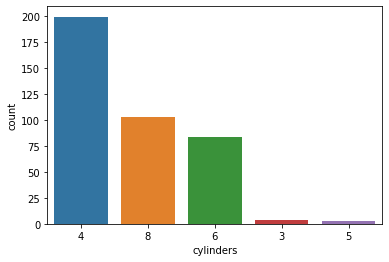

In [7]:
# If you are curious -- yes we can change the ordering
# of the plot!
# Count the number of observations 
# per number of cylinders
sns.countplot(mpg['cylinders'], order=mpg['cylinders'].value_counts().index)

### Customizing `countplot()` colors

In my opinion, filling each bar as different color isn't adding much information to the viewer and is therefore poor data visualization! 

(This is one place where Excel data visualizations do it better.)

Fortunately, we can **set all bars to a consistent color** by fixing the `color` argument.



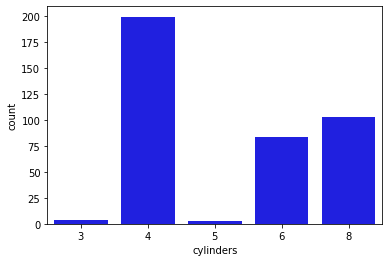

In [8]:
sns.countplot(mpg['cylinders'], color='blue')

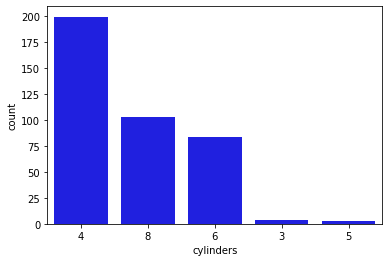

In [8]:
sns.countplot(mpg['cylinders'], order=mpg['cylinders'].value_counts().index, color='blue')

## DRILLS

For this exercise, analyze the `housing` dataset from the `data` folder: 

1. Plot a histogram of the `price` variable using 50 bins. 
2. Count the number of observations by number of `stories`.

You can code this from scratch, or fill in the code below. 

In [10]:
# Plot a histogram of price with 50 bins
sns.___(housing___,bins=___)

AttributeError: module 'seaborn' has no attribute '___'

In [11]:
# Count the number of observations by number of `stories`
___(___['___'], color='blue')

TypeError: 'AxesSubplot' object is not subscriptable

# Bivariate plotting

Now let's look at ways to compare the values of two variable simultaneously. In particular, use the following charts:

- Box plots
- Bar plots
- Scatter plots



### Box plots

Box plots are depictions of the distribution of a variable by quartile. 

Our results will look like this:
![Example box plot](images/box-plot.png)

We will plot box plots with (big surprise!) [`boxplot()`](https://seaborn.pydata.org/generated/seaborn.boxplot.html).

I would like to know the distribution of mileage by car origin.

We are now plotting *two* variables, so our `seaborn` arguments will be a little different. We will include the following arguments:

- `x`: the variable we want plotted on the x-axis
- `y`: the variable we want plotted on the y-axis
- `data`: The dataset where we can find these variables

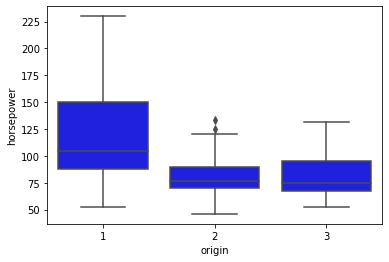

In [9]:
# Create our box plot
sns.boxplot(x='origin', y='horsepower', data=mpg, color='blue')

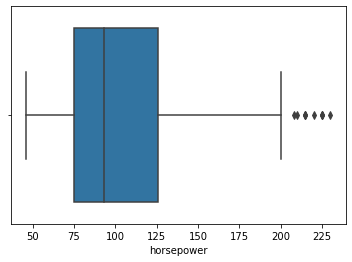

In [10]:
# Box plots can also be univariate
sns.boxplot(mpg['horsepower'])

### Bar plots

These are similar to count plots.

We will continue to view values of a categorical variable along the x-axis, but this time our y-axis will be determined by values of another variable.

For example, what if we wanted to know the average mileage for each number of cylinders? 

Let's find out using [`barplot()`](http://seaborn.pydata.org/generated/seaborn.barplot.html). 

By default, `barplot()` will sum the values on the Y-axis. We can change that with the `estimator` argument. 

We would like to know the average mileage of cars for each number of cylinders. 

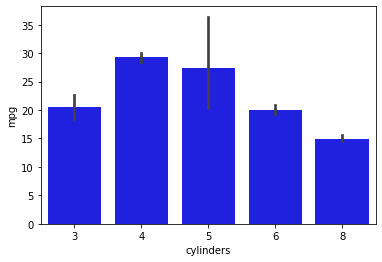

In [10]:
# Let's import mean from numpy so we can
# use it to find the average
# A confidence interval is displayed by default.
# 3- and 5-cylinder cars aren't too common! 


import numpy as np
sns.barplot(x='cylinders',y='mpg',data=mpg,estimator=np.mean,
            color='blue')


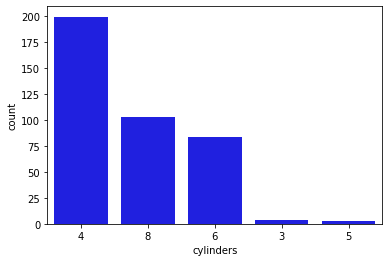

In [11]:
sns.countplot(mpg['cylinders'], order=mpg['cylinders'].value_counts().index, color='blue')

### Scatterplots

Scatterplots depict the relationship of two variables by placing each observation on an X-Y grid. 

We can do so in `seaborn` with [`scatterplot()`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html). (Say what you will about `seaborn`, but the names are straightforward!)

Let's find the relationship between `weight` and `mpg`.

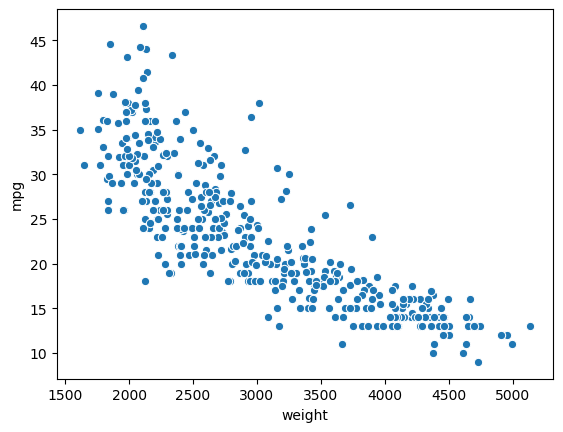

In [42]:
sns.scatterplot(x='weight',y='mpg',data=mpg)

We can color observations by category by using the `hue` argument.

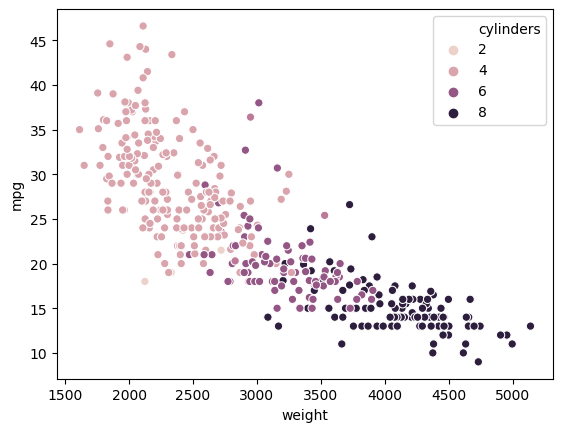

In [43]:
# There are so few datapoints with 3 and 5 cylinders that it's no
# included in our legend
sns.scatterplot(x='weight',y='mpg',hue='cylinders',data=mpg)

## Customizing our plots

### With `seaborn`

`seaborn` includes a number of options to customize the look of plots. [Read more about `seaborn` plot aesthetics at the documentation](https://seaborn.pydata.org/tutorial/aesthetics.html).

We can do so with `set_style()`.

For example, we can set the chart aesthetics to`darkgrid`:


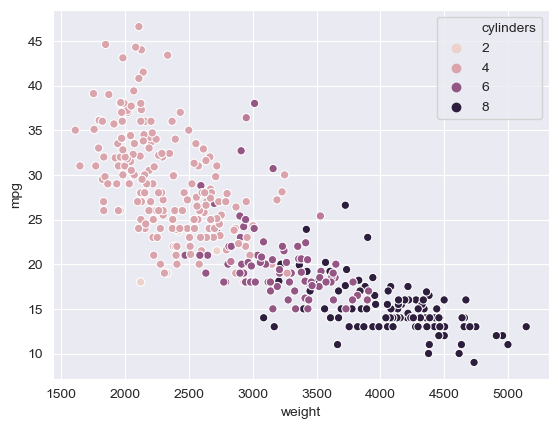

In [44]:
# You will call the style before calling the plot
sns.set_style('darkgrid')
sns.scatterplot(x='weight',y='mpg',hue='cylinders',data=mpg)

By default, your chart aeshtetics specificed with `set_style()` will remain "on" for the remainder of your session. 

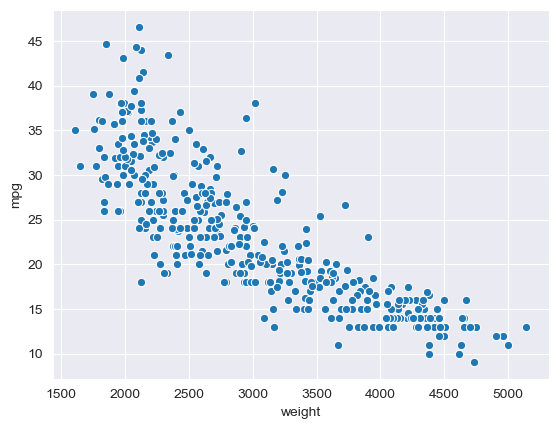

In [45]:
sns.scatterplot(x='weight',y='mpg',data=mpg)

You can reset these aesthetics with `reset_orig()`.

In [11]:
# Clear back to the chart aesthetics
sns.reset_orig()

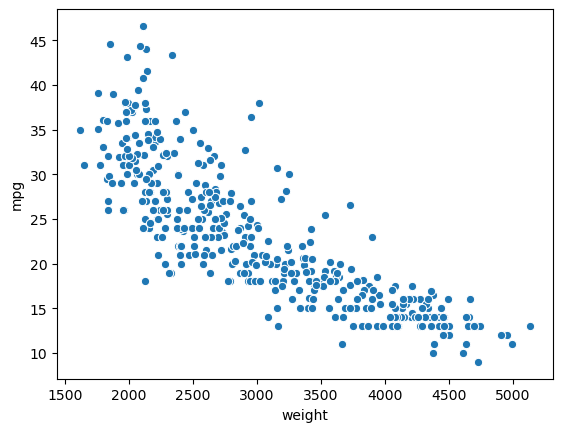

In [12]:
sns.scatterplot(x='weight',y='mpg',data=mpg)

### With `matplotlib` 

It's good 'data hygeine' to include legible axes and labels to our plot.

`seaborn` relies on `matplotlib` to do this. 

We will need to import the [`pyplot` module from `matplotlib` to do this](https://matplotlib.org/api/pyplot_api.html).

It's common to alias this as `plt`.


In [20]:
# Call in matplotlib.pyplot
import matplotlib.pyplot as plt

Let's do a few things:

1. Add a custom x-axis label with `xlabel()`.
2. Add a custom y-axis label with `ylabel()`.
3. Add a custom plot title with `title()`.

Text(0.5, 1.0, 'Vehicle weight versus mileage')

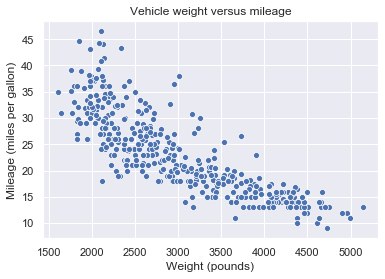

In [21]:
sns.scatterplot(x='weight',y='mpg',data=mpg)
plt.xlabel('Weight (pounds)')
plt.ylabel('Mileage (miles per gallon)')
plt.title('Vehicle weight versus mileage')

## DRILLS

For this exercise, analyze the `housing` dataset from the `data` folder: 

1. Make a box plot of the distribution of `lotsize` for each value of the `prefarea` category.  
2.  Make a scatterplot of `lotsize` versus `price`. Add a custom title to the plot.

You can code this from scratch, or fill in the code below. 

In [23]:
# Box plot of the distribution of `lotsize` for each value of the `prefarea` category.  
___.boxplot(___=___,x=___,___=housing)

SyntaxError: keyword argument repeated (<ipython-input-23-76c7d55da35b>, line 2)

In [24]:
#  Make a scatterplot of `lotsize` versus `price`. Add a custom title to the plot.

# First we need to call pyplot
___ ___ ___ plt

# Now let's make our scatterplot
sns.___(___=housing,x='lotsize',y='price')

# Now let's add a custom title
plt.___('Lot size versus sales price of houses')

SyntaxError: invalid syntax (<ipython-input-24-033085ea84b9>, line 4)

# Questions about data visualization in Python?